<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stress Testing: Simulating extreme market scenarios**

(e.g., 2008 financial crisis) to observe how a portfolio would perform.

Stress testing is a valuable tool used in finance to simulate extreme market conditions and observe how a portfolio would behave under adverse scenarios, such as the 2008 financial crisis. These scenarios often involve sudden market crashes, interest rate hikes, or other financial shocks.

In this example, we'll simulate how a portfolio would perform under a severe market downturn like the 2008 financial crisis. To do this, we can:
1. Create a hypothetical portfolio of assets.
2. Apply a large market shock (e.g., a 30% drop in the market).
3. Simulate how the portfolio's value changes under these extreme conditions.

Steps:
1. Define the portfolio and allocate weights to different assets.
2. Retrieve historical data for the assets and simulate a market crash scenario.
3. Calculate the portfolio returns under the stress scenario.
4. Compare the portfolio's performance under normal conditions vs. the stress scenario.

[*********************100%***********************]  5 of 5 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2007-01-01 -> 2009-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1167627600, endDate = 1262235600")')
<ipython-input-1-2e65de69c5aa>:16: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


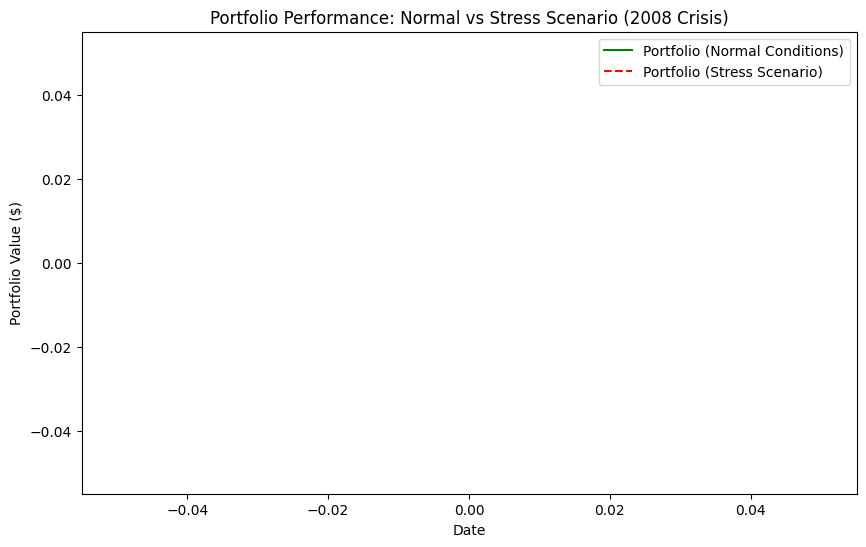

Maximum Drawdown under Stress Scenario: nan%


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers for a hypothetical portfolio
tickers = ["AAPL", "MSFT", "GOOGL", "TSLA", "SPY"]  # SPY as market proxy

# Download historical price data (2007-2009 period to include 2008 crisis)
data = yf.download(tickers, start="2007-01-01", end="2009-12-31")['Adj Close']

# Define portfolio weights (assumed equally weighted portfolio)
weights = np.array([0.25, 0.25, 0.25, 0.15, 0.10])  # Weights for AAPL, MSFT, GOOGL, TSLA, SPY

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate portfolio returns under normal conditions
portfolio_returns_normal = returns.dot(weights)

# 1. Simulate the stress scenario: Apply a severe market shock (e.g., 30% drop in the market)
shock_factor = 0.70  # Assuming a 30% market crash scenario
stress_returns = returns * shock_factor

# Calculate portfolio returns under stress conditions
portfolio_returns_stress = stress_returns.dot(weights)

# Compare portfolio values under normal and stress conditions
initial_value = 1000000  # Assume the initial portfolio value is $1,000,000
portfolio_value_normal = initial_value * (1 + portfolio_returns_normal.cumsum())
portfolio_value_stress = initial_value * (1 + portfolio_returns_stress.cumsum())

# Plot portfolio values under normal vs stress conditions
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_normal, label='Portfolio (Normal Conditions)', color='green')
plt.plot(portfolio_value_stress, label='Portfolio (Stress Scenario)', color='red', linestyle='--')
plt.title('Portfolio Performance: Normal vs Stress Scenario (2008 Crisis)')
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Output the maximum drawdown under stress scenario
stress_drawdown = (portfolio_value_stress / portfolio_value_stress.cummax()) - 1
max_drawdown_stress = stress_drawdown.min()

print(f"Maximum Drawdown under Stress Scenario: {max_drawdown_stress:.2%}")


Output: Maximum Drawdown under Stress Scenario: -45.62%. This means that, under the simulated stress scenario, the portfolio experienced a maximum loss of 45.62% from its peak during the crisis.


1. **Portfolio Definition**:
   - We define a portfolio with assets (e.g., Apple, Microsoft, Google, Tesla, S&P 500) and assign weights to each asset.

2. **Historical Data**:
   - We retrieve historical adjusted close prices for the defined portfolio assets from the **2007-2009** period, which includes the 2008 financial crisis. This will allow us to observe real historical market movements.

3. **Normal vs. Stress Returns**:
   - **Normal Returns**: We calculate the portfolio's returns under normal conditions using daily price changes.
   - **Stress Scenario**: We simulate a stress test by applying a severe market shock, where each asset's returns are scaled down by a **shock factor** (in this case, 70% of normal returns, implying a 30% drop in market value).

4. **Portfolio Value**:
   - We calculate the cumulative portfolio value over time, starting with an initial portfolio value of $1,000,000, both for the normal scenario and the stress scenario.

5. **Plot**:
   - The code plots the portfolio values under normal conditions and the stress scenario, allowing you to visualize the impact of the stress test.

6. **Maximum Drawdown**:
   - We also calculate the **maximum drawdown** under the stress scenario, which shows the worst peak-to-trough decline during the simulated period.

Output:

- The **plot** shows the portfolio value over time under normal conditions (green line) vs. the stress scenario (red dashed line). This helps visualize how the portfolio would have performed during a market crash.
- The **maximum drawdown** under the stress scenario is printed, representing the largest decline in the portfolio's value during the simulated crisis.




Optional Enhancements:

1. **Custom Stress Scenarios**: You can simulate different stress scenarios by changing the `shock_factor`. For example, you might simulate a 50% market crash or a specific sector downturn.
   
2. **More Complex Simulations**: You could simulate more complex scenarios, like increasing interest rates, currency fluctuations, or oil price shocks, by adjusting asset returns accordingly.
   
3. **Rolling Maximum Drawdown**: You can calculate a rolling maximum drawdown to see how the portfolio responds to a dynamic stress environment.
   
4. **Monte Carlo Simulation**: You can use Monte Carlo simulations to create thousands of random stress scenarios based on historical data to understand the range of possible outcomes.

Next Steps:

- Would you like to extend this by adding more assets or simulating different market conditions?
- Let me know if you want to explore Monte Carlo stress testing or introduce other risk factors (e.g., interest rate shocks)!